Flying-V landing gear load analysis and optimization
===
Author: Rutger Voeten

Supervisor: Saullo G. P. Castro

Rutger Voeten. "A design methodology for unconventional engine mounting structures applied to the Flying-V". MSc thesis, Delft University of Technology, Department of Aerospace Structures and Materials, 2022. http://resolver.tudelft.nl/uuid:8ae4ad77-43d6-44d4-ae34-bb3b118587dd

Installing dependencies
---

In [14]:
!pip install numpy scipy matplotlib pandas pymoo

Load case: EASA measured runway data for San Fransisco Runway 28R
---

In [15]:
measured_runway_data_str = "0.00 10.30 2.00 10.31 4.00 10.30 6.00 10.30 8.00 10.31 10.00 10.32 12.00 10.33 14.00 10.34 16.00 10.35 18.00 10.36 20.00 10.36 22.00 10.37 24.00 10.37 26.00 10.37 28.00 10.38 30.00 10.39 32.00 10.40 34.00 10.40 36.00 10.41 38.00 10.41 40.00 10.42 42.00 10.43 44.00 10.43 46.00 10.44 48.00 10.44 50.00 10.44 52.00 10.44 54.00 10.44 56.00 10.45 58.00 10.46 60.00 10.47 62.00 10.47 64.00 10.48 66.00 10.49 68.00 10.49 70.00 10.50 72.00 10.50 74.00 10.50 76.00 10.50 78.00 10.50 80.00 10.50 82.00 10.49 84.00 10.49 86.00 10.49 88.00 10.49 90.00 10.50 92.00 10.50 94.00 10.51 96.00 10.51 98.00 10.52 100.00 10.52 102.00 10.52 104.00 10.53 106.00 10.53 108.00 10.54 110.00 10.54 112.00 10.55 114.00 10.55 116.00 10.55 118.00 10.55 120.00 10.54 122.00 10.55 124.00 10.55 126.00 10.56 128.00 10.57 130.00 10.57 132.00 10.57 134.00 10.57 136.00 10.57 138.00 10.58 140.00 10.57 142.00 10.57 144.00 10.58 146.00 10.57 148.00 10.56 150.00 10.56 152.00 10.56 154.00 10.56 156.00 10.56 158.00 10.56 160.00 10.56 162.00 10.56 164.00 10.55 166.00 10.55 168.00 10.55 170.00 10.56 172.00 10.57 174.00 10.57 176.00 10.57 178.00 10.57 180.00 10.56 182.00 10.55 184.00 10.55 186.00 10.55 188.00 10.55 190.00 10.55 192.00 10.56 194.00 10.56 196.00 10.56 198.00 10.56 200.00 10.55 202.00 10.54 204.00 10.53 206.00 10.52 208.00 10.52 210.00 10.52 212.00 10.52 214.00 10.52 216.00 10.52 218.00 10.53 220.00 10.52 222.00 10.52 224.00 10.51 226.00 10.52 228.00 10.52 230.00 10.51 232.00 10.52 234.00 10.52 236.00 10.53 238.00 10.53 240.00 10.53 242.00 10.53 244.00 10.53 246.00 10.53 248.00 10.53 250.00 10.53 252.00 10.53 254.00 10.52 256.00 10.53 258.00 10.54 260.00 10.54 262.00 10.54 264.00 10.54 266.00 10.54 268.00 10.54 270.00 10.55 272.00 10.55 274.00 10.54 276.00 10.55 278.00 10.55 280.00 10.56 282.00 10.57 284.00 10.58 286.00 10.59 288.00 10.60 290.00 10.61 292.00 10.62 294.00 10.63 296.00 10.65 298.00 10.66 300.00 10.66 302.00 10.67 304.00 10.66 306.00 10.67 308.00 10.67 310.00 10.67 312.00 10.67 314.00 10.67 316.00 10.66 318.00 10.66 320.00 10.65 322.00 10.65 324.00 10.65 326.00 10.65 328.00 10.66 330.00 10.67 332.00 10.67 334.00 10.67 336.00 10.68 338.00 10.68 340.00 10.68 342.00 10.69 344.00 10.69 346.00 10.69 348.00 10.70 350.00 10.71 352.00 10.71 354.00 10.72 356.00 10.72 358.00 10.71 360.00 10.72 362.00 10.72 364.00 10.72 366.00 10.71 368.00 10.72 370.00 10.72 372.00 10.73 374.00 10.73 376.00 10.74 378.00 10.75 380.00 10.75 382.00 10.78 384.00 10.77 386.00 10.78 388.00 10.79 390.00 10.80 392.00 10.81 394.00 10.81 396.00 10.82 398.00 10.83 400.00 10.84 402.00 10.85 404.00 10.86 406.00 10.86 408.00 10.86 410.00 10.86 412.00 10.85 414.00 10.86 416.00 10.86 418.00 10.87 420.00 10.87 422.00 10.87 424.00 10.87 426.00 10.87 428.00 10.86 430.00 10.85 432.00 10.84 434.00 10.84 436.00 10.83 438.00 10.83 440.00 10.84 442.00 10.85 444.00 10.86 446.00 10.87 448.00 10.87 450.00 10.88 452.00 10.89 454.00 10.90 456.00 10.92 458.00 10.93 460.00 10.94 462.00 10.95 464.00 10.95 466.00 10.95 468.00 10.95 470.00 10.95 472.00 10.95 474.00 10.96 476.00 10.97 478.00 10.98 480.00 10.98 482.00 10.99 484.00 10.99 486.00 10.99 488.00 11.00 490.00 11.01 492.00 11.01 494.00 11.01 496.00 11.01 498.00 10.98 500.00 10.96 502.00 10.95 504.00 10.95 506.00 10.95 508.00 10.96 510.00 10.97 512.00 10.97 514.00 10.98 516.00 10.97 518.00 10.97 520.00 10.98 522.00 10.99 524.00 11.00 526.00 11.01 528.00 11.03 530.00 11.03 532.00 11.03 534.00 11.03 536.00 11.03 538.00 11.03 540.00 11.03 542.00 11.03 544.00 11.02 546.00 11.02 548.00 11.03 550.00 11.04 552.00 11.05 554.00 11.05 556.00 11.04 558.00 11.06 560.00 11.07 562.00 11.07 564.00 11.08 566.00 11.08 568.00 11.09 570.00 11.10 572.00 11.12 574.00 11.13 576.00 11.14 578.00 11.14 580.00 11.15 582.00 11.16 584.00 11.17 586.00 11.17 588.00 11.17 590.00 11.17 592.00 11.17 594.00 11.18 596.00 11.18 598.00 11.18 600.00 11.17 602.00 11.17 604.00 11.17 606.00 11.17 608.00 11.19 610.00 11.17 612.00 11.18 614.00 11.18 616.00 11.18 618.00 11.19 620.00 11.19 622.00 11.19 624.00 11.20 626.00 11.21 628.00 11.21 630.00 11.21 632.00 11.20 634.00 11.20 636.00 11.20 638.00 11.19 640.00 11.18 642.00 11.18 644.00 11.17 646.00 11.16 648.00 11.15 650.00 11.14 652.00 11.14 654.00 11.14 656.00 11.12 658.00 11.11 660.00 11.09 662.00 11.09 664.00 11.09 666.00 11.09 668.00 11.09 670.00 11.09 672.00 11.09 674.00 11.09 676.00 11.09 678.00 11.09 680.00 11.09 682.00 11.09 684.00 11.09 686.00 11.08 688.00 11.08 690.00 11.08 692.00 11.08 694.00 11.07 696.00 11.06 698.00 11.05 700.00 11.04 702.00 11.03 704.00 11.02 706.00 11.01 708.00 11.00 710.00 10.99 712.00 10.99 714.00 10.98 716.00 10.99 718.00 10.98 720.00 10.98 722.00 10.98 724.00 10.98 726.00 10.98 728.00 10.98 730.00 10.99 732.00 10.99 734.00 11.00 736.00 11.00 738.00 11.00 740.00 11.00 742.00 11.00 744.00 11.01 746.00 11.02 748.00 11.02 750.00 11.02 752.00 11.02 754.00 11.02 756.00 11.02 758.00 11.01 760.00 11.01 762.00 11.00 764.00 11.00 766.00 11.00 768.00 11.00 770.00 11.00 772.00 11.00 774.00 10.99 776.00 10.99 778.00 10.98 780.00 10.99 782.00 10.99 784.00 11.00 786.00 11.01 788.00 11.01 790.00 11.01 792.00 11.03 794.00 11.04 796.00 11.03 798.00 11.05 800.00 11.06 802.00 11.07 804.00 11.06 806.00 11.07 808.00 11.08 810.00 11.08 812.00 11.08 814.00 11.09 816.00 11.09 818.00 11.08 820.00 11.08 822.00 11.08 824.00 11.08 826.00 11.08 828.00 11.08 830.00 11.07 832.00 11.08 834.00 11.08 836.00 11.08 838.00 11.08 840.00 11.09 842.00 11.08 844.00 11.08 846.00 11.07 848.00 11.07 850.00 11.06 852.00 11.05 854.00 11.05 856.00 11.04 858.00 11.05 860.00 11.04 862.00 11.04 864.00 11.04 866.00 11.04 868.00 11.04 870.00 11.04 872.00 11.04 874.00 11.03 876.00 11.03 878.00 11.03 880.00 11.03 882.00 11.02 884.00 11.02 886.00 11.02 888.00 11.02 890.00 11.02 892.00 11.02 894.00 11.03 896.00 11.03 898.00 11.04 900.00 11.05 902.00 11.05 904.00 11.06 906.00 11.06 908.00 11.06 910.00 11.07 912.00 11.07 914.00 11.07 916.00 11.07 918.00 11.07 920.00 11.08 922.00 11.08 924.00 11.07 926.00 11.07 928.00 11.07 930.00 11.06 932.00 11.06 934.00 11.06 936.00 11.06 938.00 11.06 940.00 11.07 942.00 11.07 944.00 11.08 946.00 11.08 948.00 11.09 950.00 11.09 952.00 11.09 954.00 11.09 956.00 11.10 958.00 11.09 960.00 11.09 962.00 11.09 964.00 11.09 966.00 11.08 968.00 11.08 970.00 11.07 972.00 11.07 974.00 11.06 976.00 11.07 978.00 11.09 980.00 11.10 982.00 11.10 984.00 11.11 986.00 11.11 988.00 11.12 990.00 11.12 992.00 11.12 994.00 11.11 996.00 11.11 998.00 11.11 1000.00 11.11 1002.00 11.11 1004.00 11.10 1006.00 11.11 1008.00 11.11 1010.00 11.12 1012.00 11.12 1014.00 11.12 1016.00 11.11 1018.00 11.11 1020.00 11.12 1022.00 11.11 1024.00 11.11 1026.00 11.11 1028.00 11.10 1030.00 11.10 1032.00 11.12 1034.00 11.13 1036.00 11.15 1038.00 11.16 1040.00 11.17 1042.00 11.18 1044.00 11.18 1046.00 11.19 1048.00 11.19 1050.00 11.20 1052.00 11.22 1054.00 11.22 1056.00 11.23 1058.00 11.23 1060.00 11.23 1062.00 11.24 1064.00 11.25 1066.00 11.25 1068.00 11.26 1070.00 11.24 1072.00 11.27 1074.00 11.28 1076.00 11.28 1078.00 11.30 1080.00 11.31 1082.00 11.32 1084.00 11.33 1086.00 11.34 1088.00 11.34 1090.00 11.34 1092.00 11.34 1094.00 11.33 1096.00 11.32 1098.00 11.32 1100.00 11.31 1102.00 11.32 1104.00 11.32 1106.00 11.31 1108.00 11.31 1110.00 11.31 1112.00 11.32 1114.00 11.31 1116.00 11.32 1118.00 11.33 1120.00 11.34 1122.00 11.35 1124.00 11.35 1126.00 11.36 1128.00 11.36 1130.00 11.36 1132.00 11.37 1134.00 11.37 1136.00 11.37 1138.00 11.37 1140.00 11.38 1142.00 11.38 1144.00 11.38 1146.00 11.38 1148.00 11.38 1150.00 11.38 1152.00 11.38 1154.00 11.38 1156.00 11.38 1158.00 11.37 1160.00 11.37 1162.00 11.37 1164.00 11.37 1166.00 11.38 1168.00 11.38 1170.00 11.39 1172.00 11.38 1174.00 11.38 1176.00 11.39 1178.00 11.40 1180.00 11.41 1182.00 11.41 1184.00 11.42 1186.00 11.43 1188.00 11.44 1190.00 11.44 1192.00 11.45 1194.00 11.46 1196.00 11.46 1198.00 11.46 1200.00 11.46 1202.00 11.47 1204.00 11.48 1206.00 11.48 1208.00 11.48 1210.00 11.49 1212.00 11.50 1214.00 11.50 1216.00 11.50 1218.00 11.50 1220.00 11.50 1222.00 11.50 1224.00 11.49 1226.00 11.49 1228.00 11.49 1230.00 11.48 1232.00 11.47 1234.00 11.46 1236.00 11.46 1238.00 11.48 1240.00 11.46 1242.00 11.47 1244.00 11.47 1246.00 11.47 1248.00 11.47 1250.00 11.46 1252.00 11.45 1254.00 11.45 1256.00 11.45 1258.00 11.46 1260.00 11.46 1262.00 11.46 1264.00 11.45 1266.00 11.45 1268.00 11.45 1270.00 11.45 1272.00 11.45 1274.00 11.46 1276.00 11.46 1278.00 11.46 1280.00 11.48 1282.00 11.47 1284.00 11.47 1286.00 11.48 1288.00 11.48 1290.00 11.48 1292.00 11.48 1294.00 11.49 1296.00 11.49 1298.00 11.50 1300.00 11.51 1302.00 11.52 1304.00 11.52 1306.00 11.52 1308.00 11.52 1310.00 11.52 1312.00 11.52 1314.00 11.52 1316.00 11.53 1318.00 11.52 1320.00 11.52 1322.00 11.52 1324.00 11.53 1326.00 11.53 1328.00 11.53 1330.00 11.53 1332.00 11.53 1334.00 11.53 1336.00 11.54 1338.00 11.53 1340.00 11.52 1342.00 11.52 1344.00 11.51 1346.00 11.53 1348.00 11.52 1350.00 11.54 1352.00 11.53 1354.00 11.54 1356.00 11.53 1358.00 11.54 1360.00 11.53 1362.00 11.54 1364.00 11.55 1366.00 11.54 1368.00 11.54 1370.00 11.54 1372.00 11.54 1374.00 11.53 1376.00 11.52 1378.00 11.51 1380.00 11.50 1382.00 11.49 1384.00 11.49 1386.00 11.49 1388.00 11.49 1390.00 11.49 1392.00 11.48 1394.00 11.47 1396.00 11.47 1398.00 11.47 1400.00 11.46 1402.00 11.47 1404.00 11.47 1406.00 11.48 1408.00 11.47 1410.00 11.46 1412.00 11.46 1414.00 11.46 1416.00 11.46 1418.00 11.46 1420.00 11.47 1422.00 11.47 1424.00 11.47 1426.00 11.46 1428.00 11.46 1430.00 11.44 1432.00 11.43 1434.00 11.41 1436.00 11.40 1438.00 11.39 1440.00 11.38 1442.00 11.37 1444.00 11.36 1446.00 11.36 1448.00 11.35 1450.00 11.35 1452.00 11.35 1454.00 11.35 1456.00 11.35 1458.00 11.34 1460.00 11.34 1462.00 11.33 1464.00 11.32 1466.00 11.32 1468.00 11.32 1470.00 11.31 1472.00 11.31 1474.00 11.30 1476.00 11.29 1478.00 11.29 1480.00 11.28 1482.00 11.28 1484.00 11.28 1486.00 11.28 1488.00 11.28 1490.00 11.27 1492.00 11.27 1494.00 11.27 1496.00 11.26 1498.00 11.26 1500.00 11.25 1502.00 11.25 1504.00 11.24 1506.00 11.23 1508.00 11.22 1510.00 11.21 1512.00 11.19 1514.00 11.18 1516.00 11.17 1518.00 11.17 1520.00 11.15 1522.00 11.13 1524.00 11.12 1526.00 11.10 1528.00 11.10 1530.00 11.18 1532.00 11.17 1534.00 11.14 1536.00 11.14 1538.00 11.12 1540.00 11.00 1542.00 10.97 1544.00 10.95 1546.00 10.94 1548.00 10.92 1550.00 10.91 1552.00 10.92 1554.00 10.92 1556.00 10.91 1558.00 10.93 1560.00 10.93 1562.00 10.93 1564.00 10.93 1566.00 10.93 1568.00 10.93 1570.00 10.93 1572.00 10.93 1574.00 10.93 1576.00 10.93 1578.00 10.93 1580.00 10.94 1582.00 10.94 1584.00 10.94 1586.00 10.94 1588.00 10.95 1590.00 10.94 1592.00 10.93 1594.00 10.94 1596.00 10.94 1598.00 10.93 1600.00 10.92 1602.00 10.92 1604.00 10.92 1606.00 10.91 1608.00 10.91 1610.00 10.91 1612.00 10.91 1614.00 10.90 1616.00 10.89 1618.00 10.88 1620.00 10.87 1622.00 10.89 1624.00 10.88 1626.00 10.88 1628.00 10.88 1630.00 10.87 1632.00 10.86 1634.00 10.85 1636.00 10.86 1638.00 10.86 1640.00 10.85 1642.00 10.85 1644.00 10.85 1646.00 10.84 1648.00 10.84 1650.00 10.84 1652.00 10.83 1654.00 10.83 1656.00 10.82 1658.00 10.82 1660.00 10.81 1662.00 10.81 1664.00 10.80 1666.00 10.79 1668.00 10.79 1670.00 10.79 1672.00 10.79 1674.00 10.79 1676.00 10.79 1678.00 10.80 1680.00 10.80 1682.00 10.81 1684.00 10.82 1686.00 10.82 1688.00 10.83 1690.00 10.84 1692.00 10.85 1694.00 10.85 1696.00 10.85 1698.00 10.87 1700.00 10.87 1702.00 10.88 1704.00 10.87 1706.00 10.88 1708.00 10.87 1710.00 10.87 1712.00 10.87 1714.00 10.87 1716.00 10.86 1718.00 10.85 1720.00 10.84 1722.00 10.84 1724.00 10.84 1726.00 10.84 1728.00 10.84 1730.00 10.83 1732.00 10.82 1734.00 10.82 1736.00 10.82 1738.00 10.82 1740.00 10.82 1742.00 10.82 1744.00 10.83 1746.00 10.82 1748.00 10.83 1750.00 10.82 1752.00 10.82 1754.00 10.82 1756.00 10.82 1758.00 10.81 1760.00 10.81 1762.00 10.81 1764.00 10.81 1766.00 10.82 1768.00 10.82 1770.00 10.82 1772.00 10.83 1774.00 10.83 1776.00 10.83 1778.00 10.84 1780.00 10.84 1782.00 10.85 1784.00 10.86 1786.00 10.86 1788.00 10.86 1790.00 10.88 1792.00 10.87 1794.00 10.86 1796.00 10.86 1798.00 10.86 1800.00 10.87 1802.00 10.87 1804.00 10.86 1806.00 10.85 1808.00 10.85 1810.00 10.89 1812.00 10.91 1814.00 10.91 1816.00 10.92 1818.00 10.92 1820.00 10.93 1822.00 10.93 1824.00 10.93 1826.00 10.94 1828.00 10.94 1830.00 10.95 1832.00 10.94 1834.00 10.93 1836.00 10.93 1838.00 10.92 1840.00 10.93 1842.00 10.91 1844.00 10.91 1846.00 10.90 1848.00 10.90 1850.00 10.90 1852.00 10.91 1854.00 10.91 1856.00 10.89 1858.00 10.90 1860.00 10.91 1862.00 10.91 1864.00 10.91 1866.00 10.92 1868.00 10.93 1870.00 10.94 1872.00 10.94 1874.00 10.94 1876.00 10.94 1878.00 10.94 1880.00 10.95 1882.00 10.93 1884.00 10.93 1886.00 10.93 1888.00 10.93 1890.00 10.92 1892.00 10.93 1894.00 10.93 1896.00 10.93 1898.00 10.93 1900.00 10.91 1902.00 10.90 1904.00 10.91 1906.00 10.91 1908.00 10.91 1910.00 10.91 1912.00 10.91 1914.00 10.91 1916.00 10.91 1918.00 10.90 1920.00 10.90 1922.00 10.89 1924.00 10.90 1926.00 10.90 1928.00 10.90 1930.00 10.91 1932.00 10.90 1934.00 10.91 1936.00 10.89 1938.00 10.89 1940.00 10.89 1942.00 10.89 1944.00 10.89 1946.00 10.88 1948.00 10.88 1950.00 10.87 1952.00 10.87 1954.00 10.87 1956.00 10.86 1958.00 10.88 1960.00 10.87 1962.00 10.86 1964.00 10.87 1966.00 10.87 1968.00 10.86 1970.00 10.85 1972.00 10.85 1974.00 10.85 1976.00 10.86 1978.00 10.85 1980.00 10.86 1982.00 10.86 1984.00 10.86 1986.00 10.87 1988.00 10.87 1990.00 10.87 1992.00 10.87 1994.00 10.87 1996.00 10.88 1998.00 10.87 2000.00 10.88 2002.00 10.87 2004.00 10.88 2006.00 10.88 2008.00 10.88 2010.00 10.88 2012.00 10.88 2014.00 10.89 2016.00 10.90 2018.00 10.89 2020.00 10.89 2022.00 10.89 2024.00 10.89 2026.00 10.90 2028.00 10.89 2030.00 10.89 2032.00 10.88 2034.00 10.87 2036.00 10.88 2038.00 10.87 2040.00 10.87 2042.00 10.87 2044.00 10.87 2046.00 10.88 2048.00 10.88 2050.00 10.88 2052.00 10.88 2054.00 10.88 2056.00 10.88 2058.00 10.89 2060.00 10.89 2062.00 10.89 2064.00 10.89 2066.00 10.89 2068.00 10.89 2070.00 10.89 2072.00 10.88 2074.00 10.88 2076.00 10.89 2078.00 10.88 2080.00 10.89 2082.00 10.88 2084.00 10.88 2086.00 10.88 2088.00 10.88 2090.00 10.88 2092.00 10.87 2094.00 10.87 2096.00 10.87 2098.00 10.87 2100.00 10.87 2102.00 10.88 2104.00 10.88 2106.00 10.88 2108.00 10.89 2110.00 10.89 2112.00 10.90 2114.00 10.91 2116.00 10.92 2118.00 10.92 2120.00 10.93 2122.00 10.92 2124.00 10.92 2126.00 10.92 2128.00 10.92 2130.00 10.92 2132.00 10.92 2134.00 10.92 2136.00 10.93 2138.00 10.93 2140.00 10.93 2142.00 10.93 2144.00 10.93 2146.00 10.94 2148.00 10.93 2150.00 10.93 2152.00 10.93 2154.00 10.93 2156.00 10.93 2158.00 10.92 2160.00 10.92 2162.00 10.91 2164.00 10.90 2166.00 10.92 2168.00 10.91 2170.00 10.91 2172.00 10.90 2174.00 10.90 2176.00 10.90 2178.00 10.88 2180.00 10.88 2182.00 10.86 2184.00 10.85 2186.00 10.85 2188.00 10.84 2190.00 10.84 2192.00 10.84 2194.00 10.84 2196.00 10.85 2198.00 10.85 2200.00 10.85 2202.00 10.85 2204.00 10.85 2206.00 10.85 2208.00 10.86 2210.00 10.86 2212.00 10.86 2214.00 10.87 2216.00 10.88 2218.00 10.88 2220.00 10.89 2222.00 10.90 2224.00 10.91 2226.00 10.91 2228.00 10.92 2230.00 10.92 2232.00 10.93 2234.00 10.94 2236.00 10.94 2238.00 10.95 2240.00 10.96 2242.00 10.96 2244.00 10.97 2246.00 10.99 2248.00 10.99 2250.00 10.99 2252.00 10.99 2254.00 11.00 2256.00 11.00 2258.00 11.00 2260.00 11.01 2262.00 11.01 2264.00 11.02 2266.00 11.02 2268.00 11.02 2270.00 11.04 2272.00 11.05 2274.00 11.05 2276.00 11.06 2278.00 11.06 2280.00 11.05 2282.00 11.04 2284.00 11.03 2286.00 11.03 2288.00 11.02 2290.00 11.03 2292.00 11.03 2294.00 11.04 2296.00 11.05 2298.00 11.06 2300.00 11.07 2302.00 11.09 2304.00 11.10 2306.00 11.10 2308.00 11.11 2310.00 11.12 2312.00 11.14 2314.00 11.14 2316.00 11.15 2318.00 11.16 2320.00 11.16 2322.00 11.16 2324.00 11.15 2326.00 11.15 2328.00 11.16 2330.00 11.15 2332.00 11.14 2334.00 11.14 2336.00 11.14 2338.00 11.14 2340.00 11.14 2342.00 11.14 2344.00 11.15 2346.00 11.15 2348.00 11.15 2350.00 11.15 2352.00 11.15 2354.00 11.15 2356.00 11.16 2358.00 11.16 2360.00 11.15 2362.00 11.15 2364.00 11.16 2366.00 11.16 2368.00 11.16 2370.00 11.16 2372.00 11.16 2374.00 11.16 2376.00 11.16 2378.00 11.16 2380.00 11.17 2382.00 11.17 2384.00 11.17 2386.00 11.17 2388.00 11.17 2390.00 11.17 2392.00 11.17 2394.00 11.16 2396.00 11.15 2398.00 11.15 2400.00 11.14 2402.00 11.14 2404.00 11.14 2406.00 11.13 2408.00 11.12 2410.00 11.12 2412.00 11.12 2414.00 11.12 2416.00 11.12 2418.00 11.12 2420.00 11.13 2422.00 11.13 2424.00 11.14 2426.00 11.15 2428.00 11.16 2430.00 11.17 2432.00 11.18 2434.00 11.19 2436.00 11.20 2438.00 11.20 2440.00 11.22 2442.00 11.23 2444.00 11.24 2446.00 11.24 2448.00 11.25 2450.00 11.26 2452.00 11.27 2454.00 11.28 2456.00 11.28 2458.00 11.29 2460.00 11.30 2462.00 11.30 2464.00 11.30 2466.00 11.31 2468.00 11.30 2470.00 11.31 2472.00 11.31 2474.00 11.31 2476.00 11.31 2478.00 11.30 2480.00 11.30 2482.00 11.30 2484.00 11.29 2486.00 11.29 2488.00 11.29 2490.00 11.29 2492.00 11.29 2494.00 11.29 2496.00 11.29 2498.00 11.29 2500.00 11.29 2502.00 11.30 2504.00 11.30 2506.00 11.31 2508.00 11.31 2510.00 11.32 2512.00 11.32 2514.00 11.33 2516.00 11.33 2518.00 11.34 2520.00 11.35 2522.00 11.35 2524.00 11.35 2526.00 11.35 2528.00 11.35 2530.00 11.35 2532.00 11.36 2534.00 11.36 2536.00 11.35 2538.00 11.35 2540.00 11.35 2542.00 11.35 2544.00 11.35 2546.00 11.35 2548.00 11.34 2550.00 11.34 2552.00 11.34 2554.00 11.34 2556.00 11.35 2558.00 11.35 2560.00 11.35 2562.00 11.34 2564.00 11.33 2566.00 11.33 2568.00 11.33 2570.00 11.33 2572.00 11.33 2574.00 11.33 2576.00 11.33 2578.00 11.32 2580.00 11.33 2582.00 11.33 2584.00 11.33 2586.00 11.33 2588.00 11.33 2590.00 11.34 2592.00 11.34 2594.00 11.34 2596.00 11.35 2598.00 11.35 2600.00 11.35 2602.00 11.35 2604.00 11.35 2606.00 11.35 2608.00 11.35 2610.00 11.35 2612.00 11.36 2614.00 11.36 2616.00 11.36 2618.00 11.35 2620.00 11.35 2622.00 11.35 2624.00 11.35 2626.00 11.35 2628.00 11.35 2630.00 11.36 2632.00 11.36 2634.00 11.36 2636.00 11.36 2638.00 11.36 2640.00 11.37 2642.00 11.38 2644.00 11.38 2646.00 11.39 2648.00 11.39 2650.00 11.40 2652.00 11.41 2654.00 11.42 2656.00 11.42 2658.00 11.43 2660.00 11.43 2662.00 11.42 2664.00 11.42 2666.00 11.43 2668.00 11.43 2670.00 11.43 2672.00 11.43 2674.00 11.43 2676.00 11.43 2678.00 11.44 2680.00 11.44 2682.00 11.45 2684.00 11.46 2686.00 11.46 2688.00 11.47 2690.00 11.48 2692.00 11.48 2694.00 11.49 2696.00 11.49 2698.00 11.50 2700.00 11.50 2702.00 11.51 2704.00 11.52 2706.00 11.52 2708.00 11.52 2710.00 11.52 2712.00 11.52 2714.00 11.52 2716.00 11.52 2718.00 11.52 2720.00 11.52 2722.00 11.52 2724.00 11.51 2726.00 11.51 2728.00 11.51 2730.00 11.50 2732.00 11.50 2734.00 11.50 2736.00 11.50 2738.00 11.51 2740.00 11.51 2742.00 11.51 2744.00 11.52 2746.00 11.52 2748.00 11.52 2750.00 11.52 2752.00 11.53 2754.00 11.53 2756.00 11.53 2758.00 11.52 2760.00 11.52 2762.00 11.52 2764.00 11.52 2766.00 11.52 2768.00 11.52 2770.00 11.53 2772.00 11.53 2774.00 11.53 2776.00 11.54 2778.00 11.53 2780.00 11.53 2782.00 11.54 2784.00 11.54 2786.00 11.54 2788.00 11.54 2790.00 11.53 2792.00 11.53 2794.00 11.53 2796.00 11.53 2798.00 11.54 2800.00 11.54 2802.00 11.54 2804.00 11.55 2806.00 11.55 2808.00 11.55 2810.00 11.56 2812.00 11.55 2814.00 11.55 2816.00 11.55 2818.00 11.55 2820.00 11.54 2822.00 11.53 2824.00 11.53 2826.00 11.53 2828.00 11.51 2830.00 11.52 2832.00 11.52 2834.00 11.53 2836.00 11.53 2838.00 11.54 2840.00 11.55 2842.00 11.56 2844.00 11.56 2846.00 11.57 2848.00 11.57 2850.00 11.57 2852.00 11.58 2854.00 11.58 2856.00 11.58 2858.00 11.58 2860.00 11.58 2862.00 11.58 2864.00 11.59 2866.00 11.59 2868.00 11.59 2870.00 11.59 2872.00 11.58 2874.00 11.57 2876.00 11.57 2878.00 11.58 2880.00 11.57 2882.00 11.57 2884.00 11.57 2886.00 11.58 2888.00 11.58 2890.00 11.59 2892.00 11.60 2894.00 11.62 2896.00 11.61 2898.00 11.61 2900.00 11.61 2902.00 11.61 2904.00 11.61 2906.00 11.62 2908.00 11.63 2910.00 11.64 2912.00 11.65 2914.00 11.66 2916.00 11.67 2918.00 11.67 2920.00 11.67 2922.00 11.68 2924.00 11.70 2926.00 11.72 2928.00 11.73 2930.00 11.74 2932.00 11.76 2934.00 11.77 2936.00 11.78 2938.00 11.80 2940.00 11.82 2942.00 11.82 2944.00 11.82 2946.00 11.83 2948.00 11.82 2950.00 11.82 2952.00 11.83 2954.00 11.84 2956.00 11.83 2958.00 11.83 2960.00 11.83 2962.00 11.83 2964.00 11.83 2966.00 11.83 2968.00 11.84 2970.00 11.85 2972.00 11.86 2974.00 11.87 2976.00 11.88 2978.00 11.88 2980.00 11.89 2982.00 11.90 2984.00 11.90 2986.00 11.90 2988.00 11.90 2990.00 11.90 2992.00 11.90 2994.00 11.91 2996.00 11.91 2998.00 11.90 3000.00 11.91 3002.00 11.91 3004.00 11.91 3006.00 11.91 3008.00 11.90 3010.00 11.91 3012.00 11.91 3014.00 11.92 3016.00 11.92 3018.00 11.92 3020.00 11.92 3022.00 11.92 3024.00 11.92 3026.00 11.92 3028.00 11.91 3030.00 11.91 3032.00 11.92 3034.00 11.91 3036.00 11.91 3038.00 11.91 3040.00 11.91 3042.00 11.90 3044.00 11.90 3046.00 11.90 3048.00 11.90 3050.00 11.90 3052.00 11.90 3054.00 11.90 3056.00 11.90 3058.00 11.90 3060.00 11.90 3062.00 11.91 3064.00 11.92 3066.00 11.92 3068.00 11.92 3070.00 11.93 3072.00 11.93 3074.00 11.93 3076.00 11.93 3078.00 11.94 3080.00 11.94 3082.00 11.95 3084.00 11.95 3086.00 11.95 3088.00 11.96 3090.00 11.96 3092.00 11.96 3094.00 11.96 3096.00 11.96 3098.00 11.96 3100.00 11.95 3102.00 11.94 3104.00 11.93 3106.00 11.92 3108.00 11.92 3110.00 11.92 3112.00 11.92 3114.00 11.92 3116.00 11.92 3118.00 11.92 3120.00 11.92 3122.00 11.92 3124.00 11.92 3126.00 11.92 3128.00 11.91 3130.00 11.90 3132.00 11.90 3134.00 11.90 3136.00 11.90 3138.00 11.90 3140.00 11.90 3142.00 11.90 3144.00 11.90 3146.00 11.90 3148.00 11.90 3150.00 11.90 3152.00 11.90 3154.00 11.90 3156.00 11.90 3158.00 11.90 3160.00 11.90 3162.00 11.89 3164.00 11.88 3166.00 11.88 3168.00 11.87 3170.00 11.87 3172.00 11.86 3174.00 11.86 3176.00 11.85 3178.00 11.85 3180.00 11.84 3182.00 11.84 3184.00 11.84 3186.00 11.84 3188.00 11.84 3190.00 11.85 3192.00 11.87 3194.00 11.89 3196.00 11.89 3198.00 11.90 3200.00 11.89 3202.00 11.92 3204.00 11.95 3206.00 11.95 3208.00 11.95 3210.00 11.94 3212.00 11.94 3214.00 11.93 3216.00 11.92 3218.00 11.92 3220.00 11.91 3222.00 11.90 3224.00 11.90 3226.00 11.89 3228.00 11.88 3230.00 11.87 3232.00 11.86 3234.00 11.85 3236.00 11.84 3238.00 11.84 3240.00 11.84 3242.00 11.83 3244.00 11.82 3246.00 11.82 3248.00 11.81 3250.00 11.83 3252.00 11.83 3254.00 11.83 3256.00 11.84 3258.00 11.84 3260.00 11.84 3262.00 11.84 3264.00 11.82 3266.00 11.83 3268.00 11.82 3270.00 11.83 3272.00 11.83 3274.00 11.84 3276.00 11.84 3278.00 11.84 3280.00 11.85 3282.00 11.84 3284.00 11.84 3286.00 11.84 3288.00 11.85 3290.00 11.85 3292.00 11.85 3294.00 11.86 3296.00 11.86 3298.00 11.84 3300.00 11.84 3302.00 11.84 3304.00 11.84 3306.00 11.84 3308.00 11.84 3310.00 11.84 3312.00 11.84 3314.00 11.84 3316.00 11.84 3318.00 11.84 3320.00 11.84 3322.00 11.83 3324.00 11.83 3326.00 11.83 3328.00 11.82 3330.00 11.83 3332.00 11.83 3334.00 11.83 3336.00 11.82 3338.00 11.82 3340.00 11.83 3342.00 11.82 3344.00 11.83 3346.00 11.83 3348.00 11.84 3350.00 11.84 3352.00 11.83 3354.00 11.83 3356.00 11.83 3358.00 11.83 3360.00 11.83 3362.00 11.84 3364.00 11.84 3366.00 11.84 3368.00 11.85 3370.00 11.85 3372.00 11.85 3374.00 11.85 3376.00 11.84 3378.00 11.84 3380.00 11.85 3382.00 11.85 3384.00 11.86 3386.00 11.86 3388.00 11.87 3390.00 11.87 3392.00 11.87 3394.00 11.87 3396.00 11.87 3398.00 11.86 3400.00 11.87 3402.00 11.87 3404.00 11.88 3406.00 11.89 3408.00 11.89 3410.00 11.89 3412.00 11.91 3414.00 11.91 3416.00 11.92 3418.00 11.93 3420.00 11.95 3422.00 11.95 3424.00 11.96 3426.00 11.96 3428.00 11.96 3430.00 11.96 3432.00 11.95 3434.00 11.96 3436.00 11.96 3438.00 11.96 3440.00 11.96 3442.00 11.95 3444.00 11.95 3446.00 11.94 3448.00 11.96 3450.00 11.98 3452.00 11.99 3454.00 12.01 3456.00 12.03 3458.00 12.04 3460.00 12.05 3462.00 12.05 3464.00 12.05 3466.00 12.05 3468.00 12.05 3470.00 12.05 3472.00 12.04 3474.00 12.06 3476.00 12.06 3478.00 12.07 3480.00 12.07 3482.00 12.07 3484.00 12.07 3486.00 12.06 3488.00 12.07 3490.00 12.07 3492.00 12.08 3494.00 12.08 3496.00 12.08 3498.00 12.09 3500.00 12.09 3502.00 12.08 3504.00 12.08 3506.00 12.08 3508.00 12.08 3510.00 12.08 3512.00 12.09 3514.00 12.10 3516.00 12.10 3518.00 12.10 3520.00 12.10 3522.00 12.10 3524.00 12.11 3526.00 12.11 3528.00 12.12 3530.00 12.13 3532.00 12.13 3534.00 12.13 3536.00 12.13 3538.00 12.14 3540.00 12.14 3542.00 12.13 3544.00 12.13 3546.00 12.13 3548.00 12.11 3550.00 12.10 3552.00 12.07 3554.00 12.06 3556.00 12.07 3558.00 12.08 3560.00 12.09 3562.00 12.10 3564.00 12.11 3566.00 12.11 3568.00 12.12 3570.00 12.06 3572.00 12.01 3574.00 12.03 3576.00 12.04 3578.00 12.05 3580.00 12.05 3582.00 12.06 3584.00 12.06 3586.00 12.05 3588.00 12.04 3590.00 12.03 3592.00 12.02 3594.00 12.02 3596.00 12.02 3598.00 12.02 3600.00 12.01 3602.00 11.99 3604.00 11.98 3606.00 11.94 3608.00 11.94 3610.00 11.93 3612.00 11.93 3614.00 11.92 3616.00 11.91 3618.00 11.90 3620.00 11.90 3622.00 11.90 3624.00 11.90 3626.00 11.90 3628.00 11.91 3630.00 11.90 3632.00 11.88 3634.00 11.87 3636.00 11.87 3638.00 11.86 3640.00 11.86 3642.00 11.85 3644.00 11.86 3646.00 11.86 3648.00 11.85 3650.00 11.85 3652.00 11.85 3654.00 11.86 3656.00 11.86 3658.00 11.87 3660.00 11.86 3662.00 11.86 3664.00 11.85 3666.00 11.84 3668.00 11.85 3670.00 11.85 3672.00 11.87 3674.00 11.89 3676.00 11.88 3678.00 11.88 3680.00 11.88 3682.00 11.89 3684.00 11.90 3686.00 11.91 3688.00 11.91 3690.00 11.91 3692.00 11.91 3694.00 11.92 3696.00 11.92 3698.00 11.93 3700.00 11.94 3702.00 11.94 3704.00 11.95 3706.00 11.95 3708.00 11.95 3710.00 11.95 3712.00 11.95 3714.00 11.96 3716.00 11.95 3718.00 11.95 3720.00 11.96 3722.00 11.97 3724.00 11.98 3726.00 11.98 3728.00 11.99 3730.00 12.00 3732.00 12.00 3734.00 11.99 3736.00 11.99 3738.00 11.99 3740.00 12.00 3742.00 12.00 3744.00 12.01 3746.00 12.02 3748.00 12.02 3750.00 12.03 3752.00 12.04 3754.00 12.05 3756.00 12.06 3758.00 12.06 3760.00 12.06 3762.00 12.06 3764.00 12.06 3766.00 12.06 3768.00 12.06 3770.00 12.06 3772.00 12.07 3774.00 12.08 3776.00 12.09 3778.00 12.10 3780.00 12.09 3782.00 12.12 3784.00 12.13 3786.00 12.14 3788.00 12.13 3790.00 12.14 3792.00 12.14 3794.00 12.14 3796.00 12.15 3798.00 12.15 3800.00 12.16 3802.00 12.16 3804.00 12.17 3806.00 12.17 3808.00 12.17 3810.00 12.15 3812.00 12.14 3814.00 12.13 3816.00 12.12 3818.00 12.11 3820.00 12.10 3822.00 12.09 3824.00 12.09 3826.00 12.09 3828.00 12.08 3830.00 12.07 3832.00 12.07 3834.00 12.06 3836.00 12.05 3838.00 12.03 3840.00 12.03 3842.00 12.02 3844.00 12.01 3846.00 12.02 3848.00 12.01 3850.00 12.01 3852.00 12.01 3854.00 12.01 3856.00 12.02 3858.00 12.02 3860.00 12.01 3862.00 12.00 3864.00 12.00 3866.00"
measured_runway_data = list(map(float, measured_runway_data_str.split(' ')))

In [16]:
"""
Interpolation of runway bumps from CS-25 - AMC 25.491 Taxï, take-off and landing roll
Rutger Voeten 26-11-2021
"""

import numpy as np
import matplotlib.pyplot as plt


class RunWayInterpolation:
    def __init__(self, data):
        self.LoadData(data)

    def LoadData(self, data):
        self.distance = np.array(data[0:-1:2]) * 0.3048 #Read distance in meters
        self.elevation = ((np.array(data[1::2]))  - data[1]) * 0.3048 # Start from zero elevation
        
    def shiftElevation(self, meterstoshift):
        self.distance += meterstoshift

    def plotrunwayelevation(self, interpolation_points):
        fig, ax = plt.subplots(nrows=1, figsize=(15, 5), dpi=200)

        #Interpolation points
        x = np.linspace(np.min(self.distance), np.max(self.distance), interpolation_points)
        el_interp = self.LinearInterpolation(x)

        #Plot measured data
        ax.plot(x, el_interp, label = 'Interpolated data with {} points'.format(interpolation_points))
        ax.set_title('Runway elevation SAN FRANCISCO RUNWAY 28R')
        ax.plot(self.distance, self.elevation, label = 'Data by EASA', alpha=0.4)
        ax.grid()
        ax.legend()
        ax.set_xlabel('Runway distance [m]')
        ax.set_ylabel('Elevation [m]')
        plt.show()

    def LinearInterpolation(self, x):
        """ returns linear splines """
        f = np.interp(x, self.distance, self.elevation)
        return f



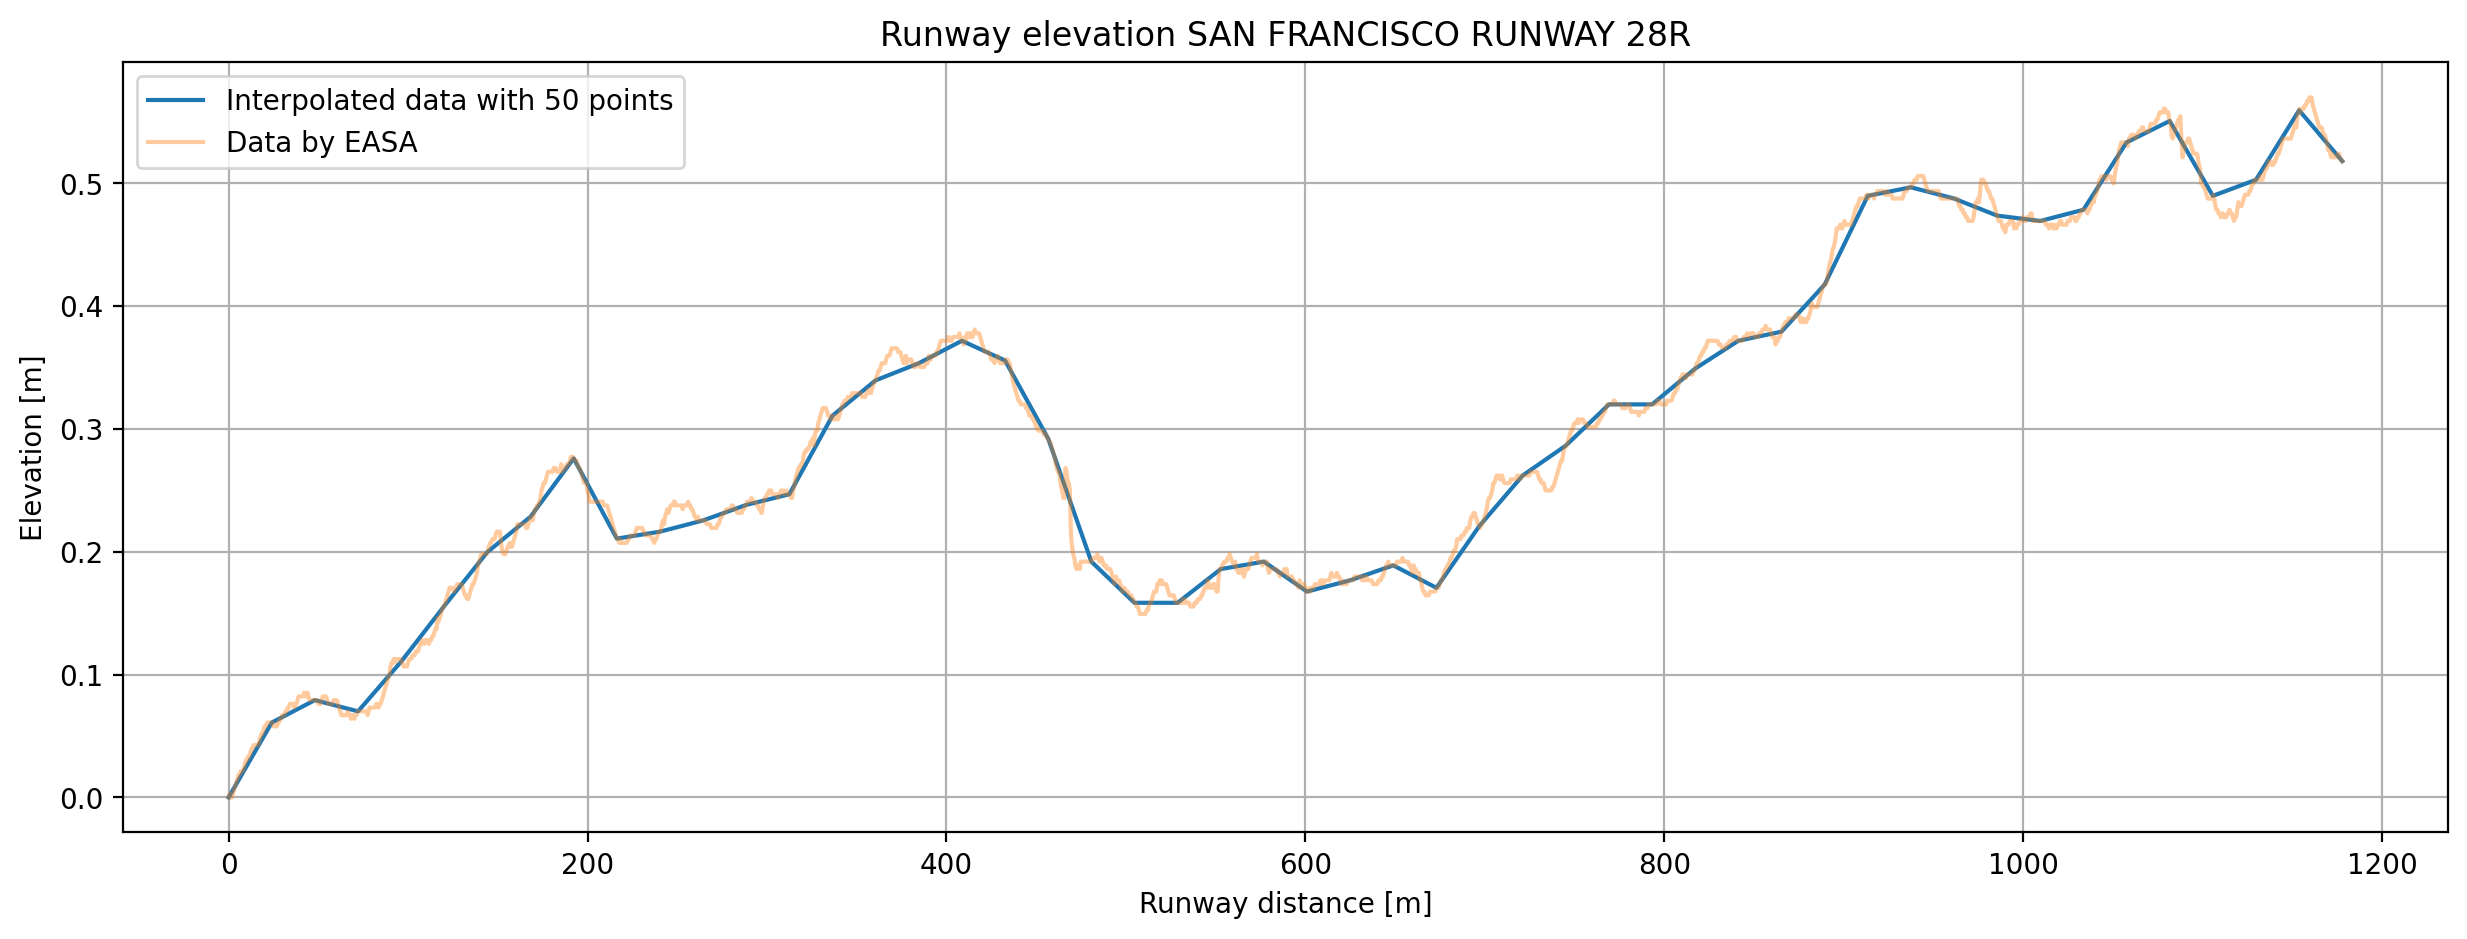

In [17]:
runwayint = RunWayInterpolation(measured_runway_data)
runwayint.plotrunwayelevation(50)

Load case: cosine bump
---

In [18]:
def Get1_CosineBumpInput(Hb, V, t, L):
    H = np.zeros_like(t)
    H[(t <= (2 * L / V))] = Hb / 2 * (1 - np.cos(np.pi * V * t[(t <= (2 * L / V))] / L))
    H[t > (2 * L / V)] = 0
    tshift = np.argmin(np.abs(t - MetersToShift / V))
    H = np.roll(H, tshift) #Shif
    return H


Equation of motion
---

$M_{ac} \ddot{𝑧}_1 = L − M_{ac} \cdot g − K \cdot (z_1 − z_2) − C \cdot (\dot{z}_1 − \dot{z}_2)$
---

which can be mass-normalized as:

$\ddot{𝑧}_1 = L/M_{ac}  − g − K/M_{ac} \cdot (z_1 − z_2) − C/M_{ac} \cdot (\dot{z}_1 − \dot{z}_2)$
---


In [19]:
def OEMLG_Input(y, t, K, C, L, M, g , z2i, z2di):
    z1 = y[0]
    z1d = y[1]
    z2 = z2i(t)
    z2d = z2di(t)
    z1dd = L / M - g - K/M * (z1 - z2) - C / M * (z1d - z2d)
    return ([z1d, z1dd])


Adopted constants
---

In [20]:
g = 9.81 #[m/s^2]
Vr = 93 #[m/s]

#Loadcase dependant constants, parameters for optimisation
Mlw = 201139.7 #[kg] Excel
Mlw_lat = Mlw/2

LandingGearCoGMisplacement = 1. # offset from the aircraft CG
Mtow = 265e3 * LandingGearCoGMisplacement #[kg] #40 % of the mass

VerticalLandingSpeed = -3.05 #[m/s]

L_LD_OG = Mlw * g
L_LD_LA = Mlw_lat * g
L_TO = 0

max_stroke = 0.8 #[m]
min_eigenfreq = 1e-3 #[Hz]

Assumed values
---

In [21]:
K = 1628211.03931857
C = 315730.45091199

Comparing load cases
---

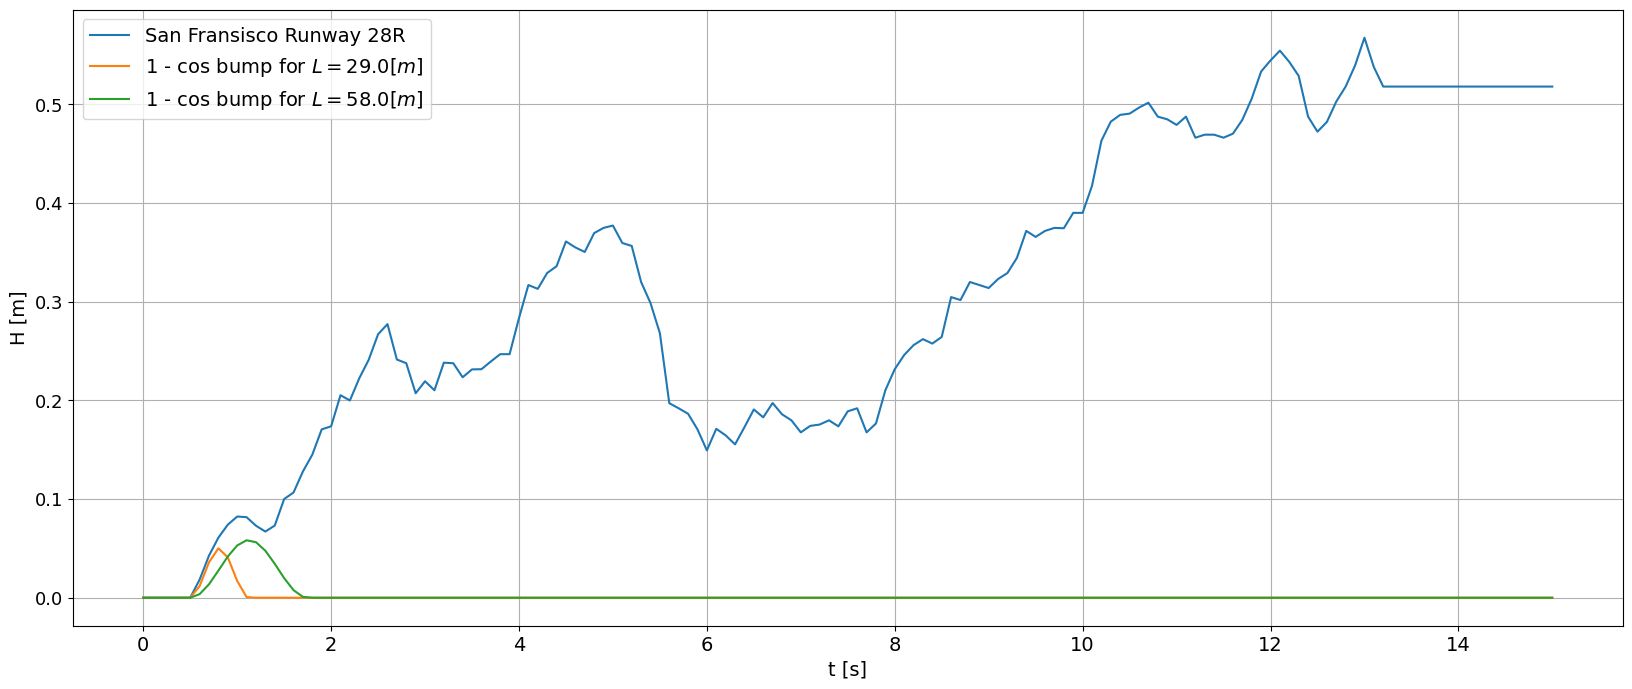

In [22]:
#Time array for analysis
dt = 0.1
t = np.arange(0,15 + dt, dt)


#Shift runwayelevation, also shift cosine bumps
MetersToShift = 50

#Bounce back allowance
BounceBackAll = 0.3

def GetRunWayElevationInput(t, V):
    runway = RunWayInterpolation(measured_runway_data)
    runway.shiftElevation(MetersToShift)
    s = Vr * t
    runwayElevation = runway.LinearInterpolation(s)
    a = 1
    return runwayElevation

#The diferrent loadcases
L1 = 29e3 #[mm]
L2 = 58e3 #[mm]
A = 30.5 #if
B = 0.116

Hb1 = (A + B * np.sqrt(L1))*1e-3
Hb2 = (A + B * np.sqrt(L2))*1e-3

#Get inputs
Elevation = GetRunWayElevationInput(t, Vr)
CosineBump1 = Get1_CosineBumpInput(Hb1, Vr, t, L1*1e-3)
CosineBump2 = Get1_CosineBumpInput(Hb2, Vr, t, L2*1e-3)

GradElev = np.gradient(Elevation, t)
GradCos1 = np.gradient(CosineBump1, t)
GradCos2 = np.gradient(CosineBump2, t)

OneGearLanding = lambda time: 0.
GradOneGearLanding = lambda time: 0.

LateralLanding = lambda time: 0.0
GradLateralLanding = lambda time:0.

RunWayElevationFun = lambda time: np.interp(time, t, Elevation)
GradRunWayElevationFun = lambda time: np.interp(time, t, GradElev)

CosineBump1Fun = lambda time: np.interp(time, t, CosineBump1)
GradCosineBump1Fun = lambda time: np.interp(time, t, GradCos1)

CosineBump2Fun = lambda time: np.interp(time, t, CosineBump2)
GradCosineBump2Fun = lambda time: np.interp(time, t, GradCos2)

plt.figure(figsize=(20,8))
plt.plot(t, Elevation, label = 'San Fransisco Runway 28R')
plt.plot(t, CosineBump1, label = '1 - cos bump for $L = {} [m]$'.format(L1*1e-3))
plt.plot(t, CosineBump2, label= '1 - cos bump for $L = {} [m]$'.format(L2*1e-3))
plt.xlabel("t [s]", fontsize = 14)
plt.ylabel("H [m]", fontsize = 14)
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize=13)
plt.grid()

Analyzing load cases
---

In [23]:
from scipy.integrate import odeint

#Take off loadcases

Y0 = [- Mtow * g / K, 0]
solEl = odeint(OEMLG_Input, Y0, t, args=(K, C, L_TO, Mtow, g, RunWayElevationFun, GradRunWayElevationFun))
solCos1 = odeint(OEMLG_Input, Y0, t, args=(K, C, L_TO, Mtow, g, CosineBump1Fun, GradCosineBump1Fun))
solCos2 = odeint(OEMLG_Input, Y0, t, args=(K, C, L_TO, Mtow, g, CosineBump2Fun, GradCosineBump2Fun))

z1_El = solEl[:,0]
z1d_El = solEl[:,1]
z1_cos1 = solCos1[:,0]
z1d_cos1 = solCos1[:,1]
z1_cos2 = solCos2[:,0]
z1d_cos2 = solCos2[:,1]

z2_cos1 = CosineBump1Fun(t)
z2d_cos1 = GradCosineBump1Fun(t)
z2_cos2 = CosineBump2Fun(t)
z2d_cos2 = GradCosineBump2Fun(t)
z2_El = RunWayElevationFun(t)
z2d_El = GradRunWayElevationFun(t)

Mac = Mtow
z1dd_El = L_TO / Mac - g - K/Mac * (z1_El - z2_El) - C / Mac * (z1d_El - z2d_El)
z1dd_cos1 = L_TO / Mac - g - K/Mac * (z1_cos1 - z2_cos1) - C / Mac * (z1d_cos1 - z2d_cos1)
z1dd_cos2 = L_TO / Mac - g - K/Mac * (z1_cos2 - z2_cos2) - C / Mac * (z1d_cos2 - z2d_cos2)

#Landing loadcases
Y0_landing = [0, VerticalLandingSpeed]
solLDOG = odeint(OEMLG_Input, Y0_landing, t, args=(K, C, L_LD_OG, Mlw, g, OneGearLanding, GradOneGearLanding))
solLDLA = odeint(OEMLG_Input, Y0_landing, t, args=(K, C, L_LD_LA, Mlw_lat, g, LateralLanding, GradLateralLanding))

z1_OG = solLDOG[:,0]
z1d_OG = solLDOG[:,1]
z1_LA = solLDLA[:,0]
z1d_LA = solLDLA[:,1]

Mac = Mlw
z1dd_OG = L_LD_OG / Mac - g - K/Mac * (z1_OG) - C / Mac * (z1d_OG)

Mac = Mlw_lat
z1dd_LA = L_LD_LA / Mac - g - K/Mac * (z1_LA) - C / Mac * (z1d_LA)

Plotting results
---

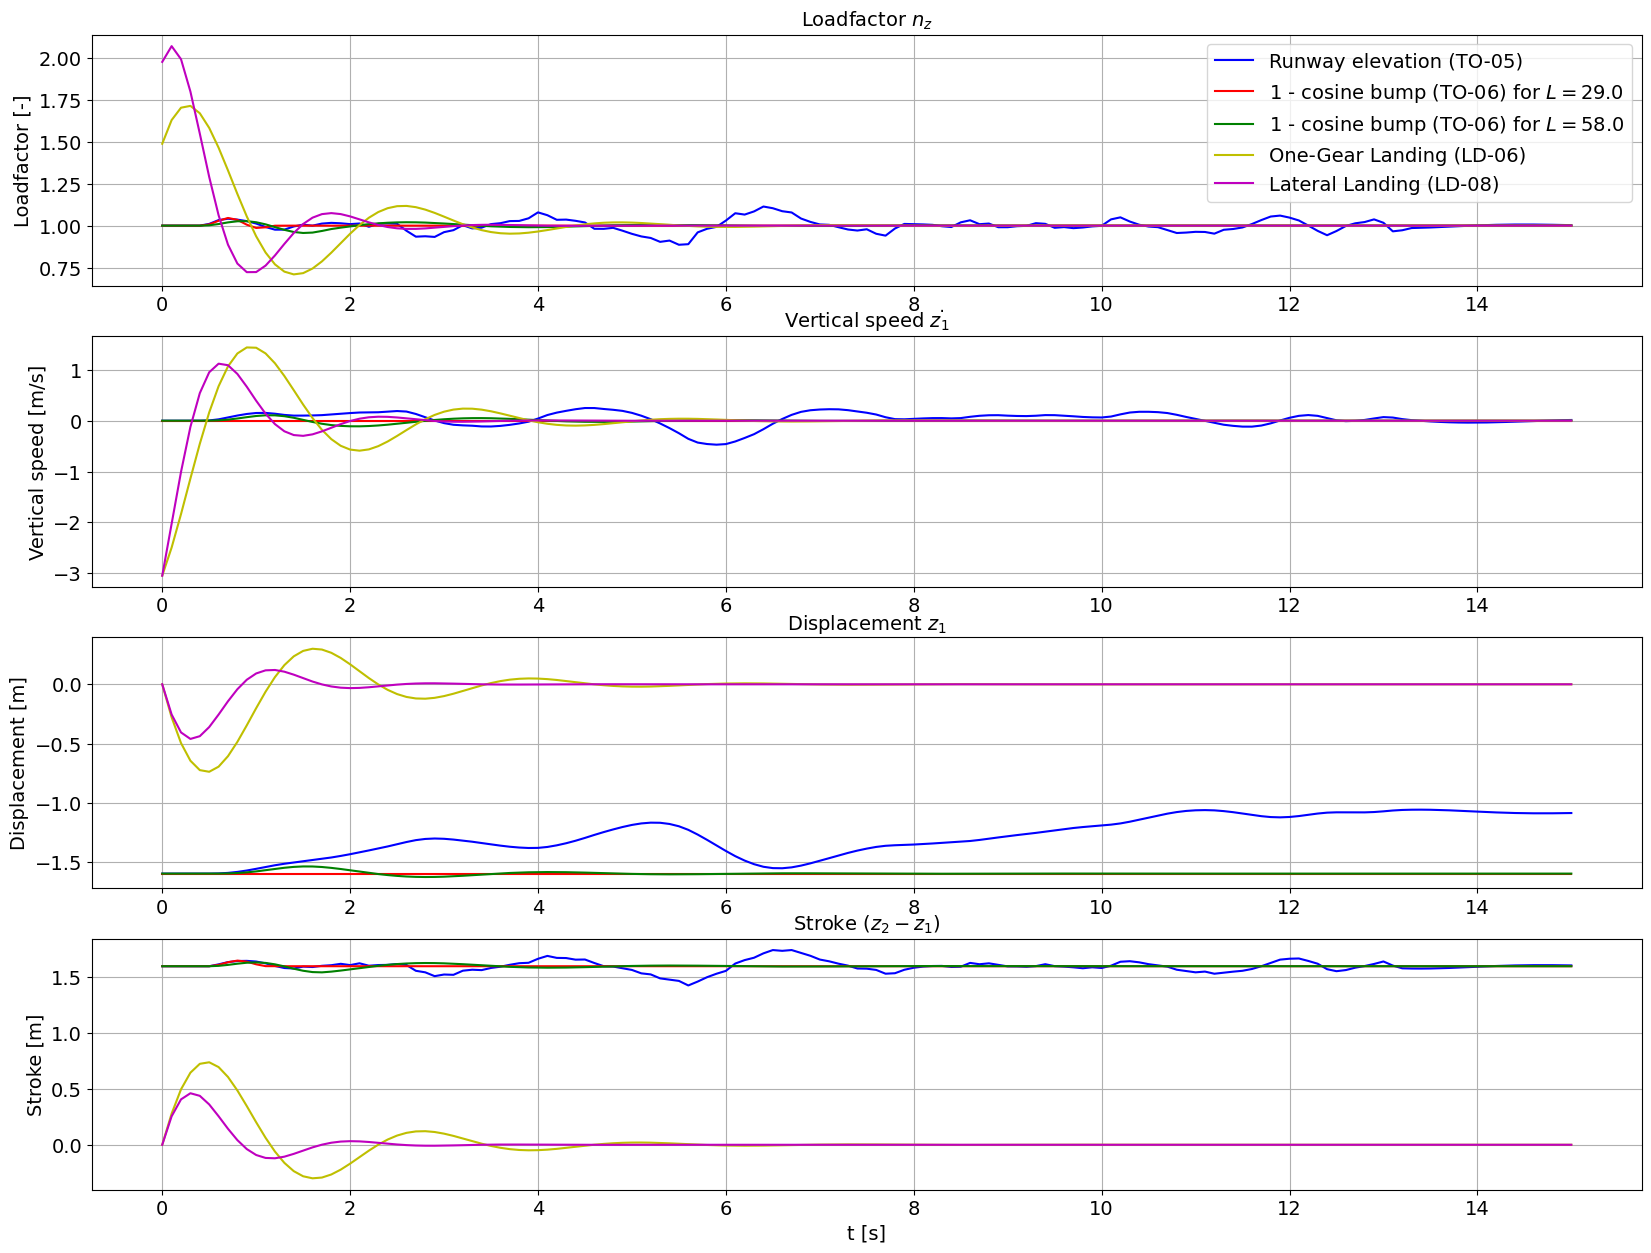

In [24]:
fig, ax = plt.subplots(4,1, figsize = (20, 15))

ax[0].set_title("Loadfactor $n_{z}$",fontsize = 14)
ax[0].plot(t, z1dd_El / g +  g / g, label = 'Runway elevation (TO-05)', color = 'b')
ax[0].plot(t, z1dd_cos1 / g + g / g, label = f'1 - cosine bump (TO-06) for $L = {L1*1e-3}$', color = 'r')
ax[0].plot(t, z1dd_cos2 / g + g / g, label = f'1 - cosine bump (TO-06) for $L = {L2*1e-3}$', color = 'g')
ax[0].plot(t, z1dd_OG / g + g / g, label = f'One-Gear Landing (LD-06)', color = 'y')
ax[0].plot(t, z1dd_LA / g + g / g, label = f'Lateral Landing (LD-08)', color = 'm')
ax[0].set_ylabel("Loadfactor [-]", fontsize = 14)
ax[0].tick_params(axis='both', labelsize = 14)
ax[0].grid()
ax[0].legend(fontsize = 14)

ax[1].set_title("Vertical speed $\dot{z_{1}}$",fontsize = 14)
ax[1].plot(t, z1d_El, label = 'Runway elevation (TO-05)', color = 'b')
ax[1].plot(t, z1d_cos1, label = f'1 - cosine bump (TO-06) for $L = {L1*1e-3}$', color = 'r')
ax[1].plot(t, z1d_cos2, label = f'1 - cosine bump (TO-06) for $L = {L2*1e-3}$', color = 'g')
ax[1].plot(t, z1d_OG, label = f'One-Gear Landing (LD-06)', color = 'y')
ax[1].plot(t, z1d_LA, label = f'Lateral Landing (LD-08)', color = 'm')
ax[1].tick_params(axis = 'both', labelsize = 14)
ax[1].set_ylabel("Vertical speed [m/s]", fontsize = 14)
ax[1].grid()

ax[2].set_title("Displacement $z_{1}$",fontsize = 14)
ax[2].plot(t, z1_El, label = 'Runway elevation (TO-05)', color = 'b')
# ax[2].plot(t, (z2_El - z1_El), label = 'Runway elevation Stroke (TO-05)')
ax[2].plot(t, z1_cos1, label = f'1 - cosine bump (TO-06) for $L = {L1*1e-3}$', color = 'r')
ax[2].plot(t, z1_cos2, label = f'1 - cosine bump (TO-06) for $L = {L2*1e-3}$', color = 'g')
ax[2].plot(t, z1_OG, label = f'One-Gear Landing (LD-06)', color = 'y')
ax[2].plot(t, z1_LA, label = f'Lateral Landing (LD-08)', color = 'm')
ax[2].tick_params(axis = 'both', labelsize = 14)
ax[2].set_ylabel("Displacement [m]", fontsize = 14)
ax[2].grid()

ax[3].set_title("Stroke ($z_2 - z_1$)",fontsize = 14)
ax[3].plot(t, (z2_El - z1_El), label = 'Runway elevation (TO-05)', color = 'b')
# ax[2].plot(t, (z2_El - z1_El), label = 'Runway elevation Stroke (TO-05)')
ax[3].plot(t, (z2_cos1 - z1_cos1), label = f'1 - cosine bump (TO-06) for $L = {L1*1e-3}$', color = 'r')
ax[3].plot(t, (z2_cos2 - z1_cos2), label = f'1 - cosine bump (TO-06) for $L = {L2*1e-3}$', color = 'g')
ax[3].plot(t, -z1_OG, label = f'One-Gear Landing (LD-06)', color = 'y')
ax[3].plot(t, -z1_LA, label = f'Lateral Landing (LD-08)', color = 'm')
ax[3].set_ylabel("Stroke [m]", fontsize = 14)
ax[3].tick_params(axis = 'both', labelsize = 14)
ax[3].set_xlabel('t [s]', fontsize = 14)
ax[3].grid()


plt.show()

Ploting reaction forces and reaction moments
---

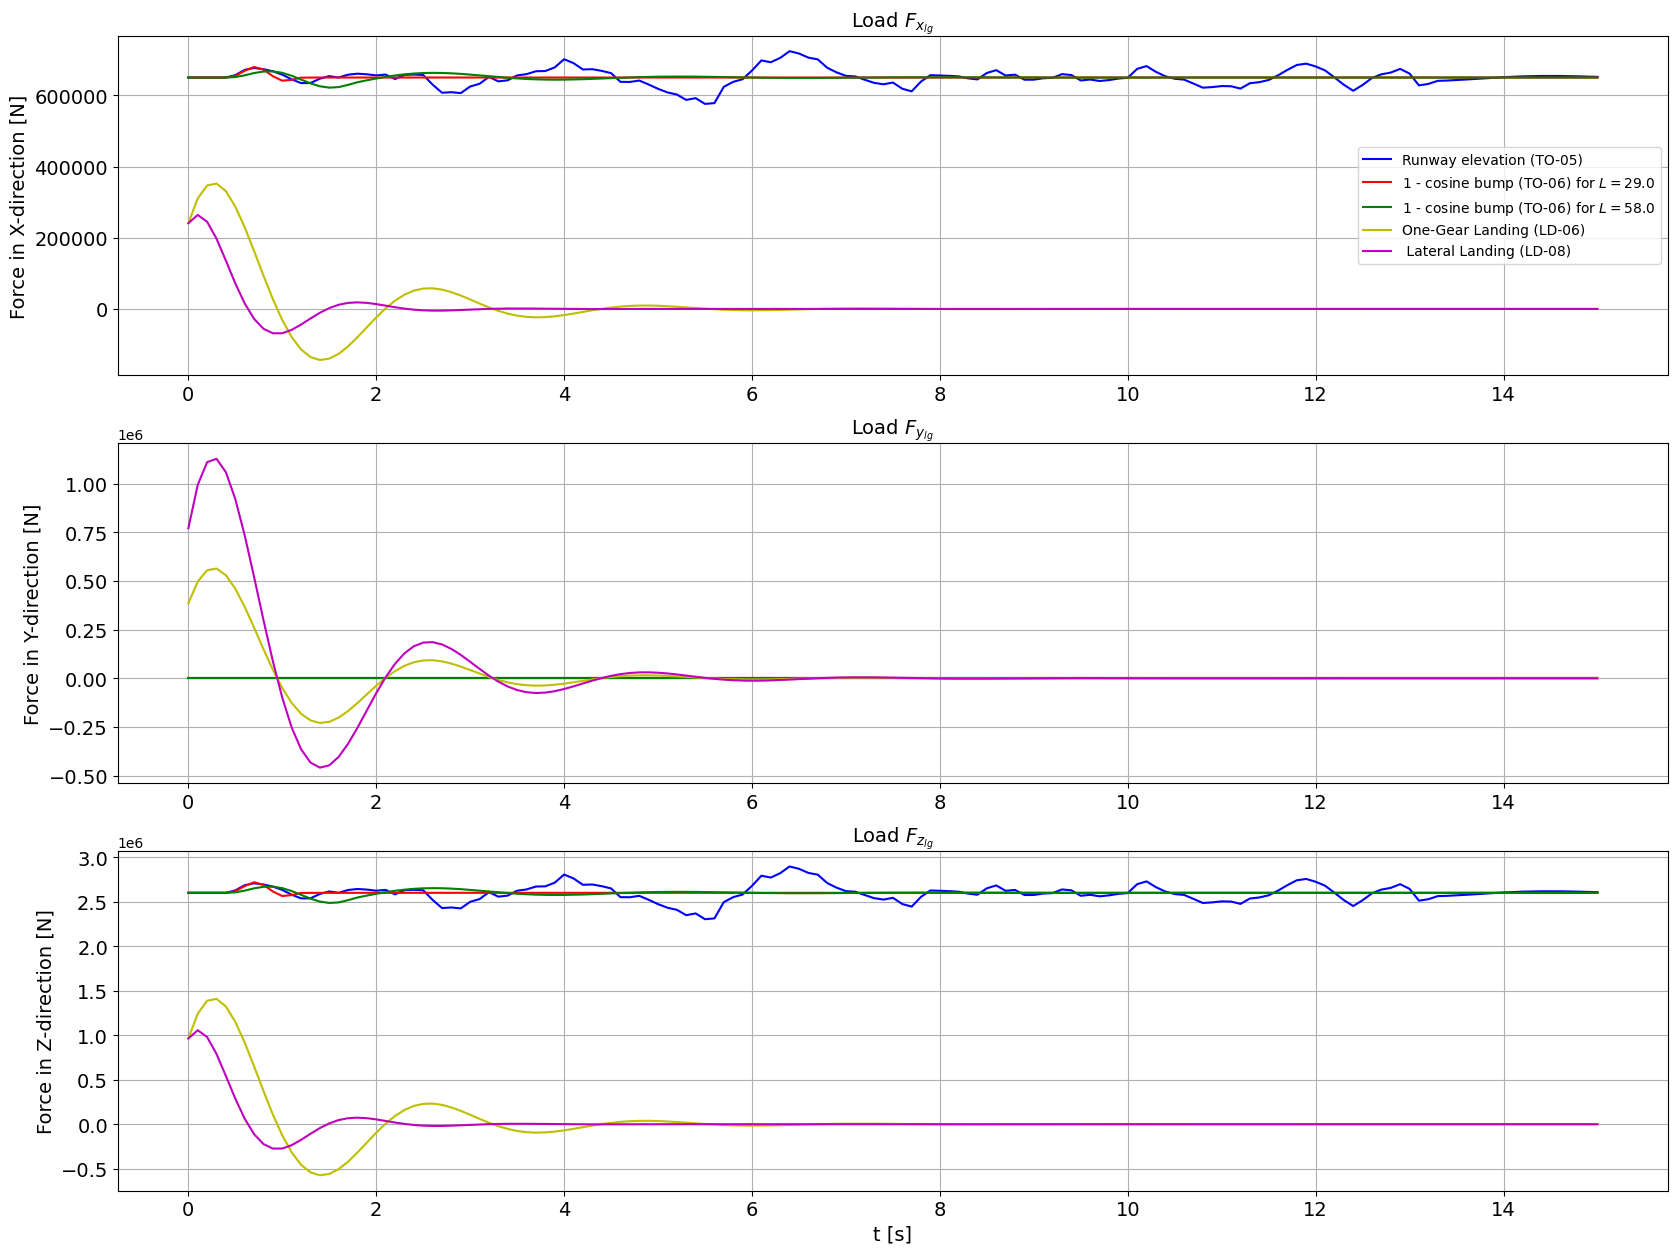

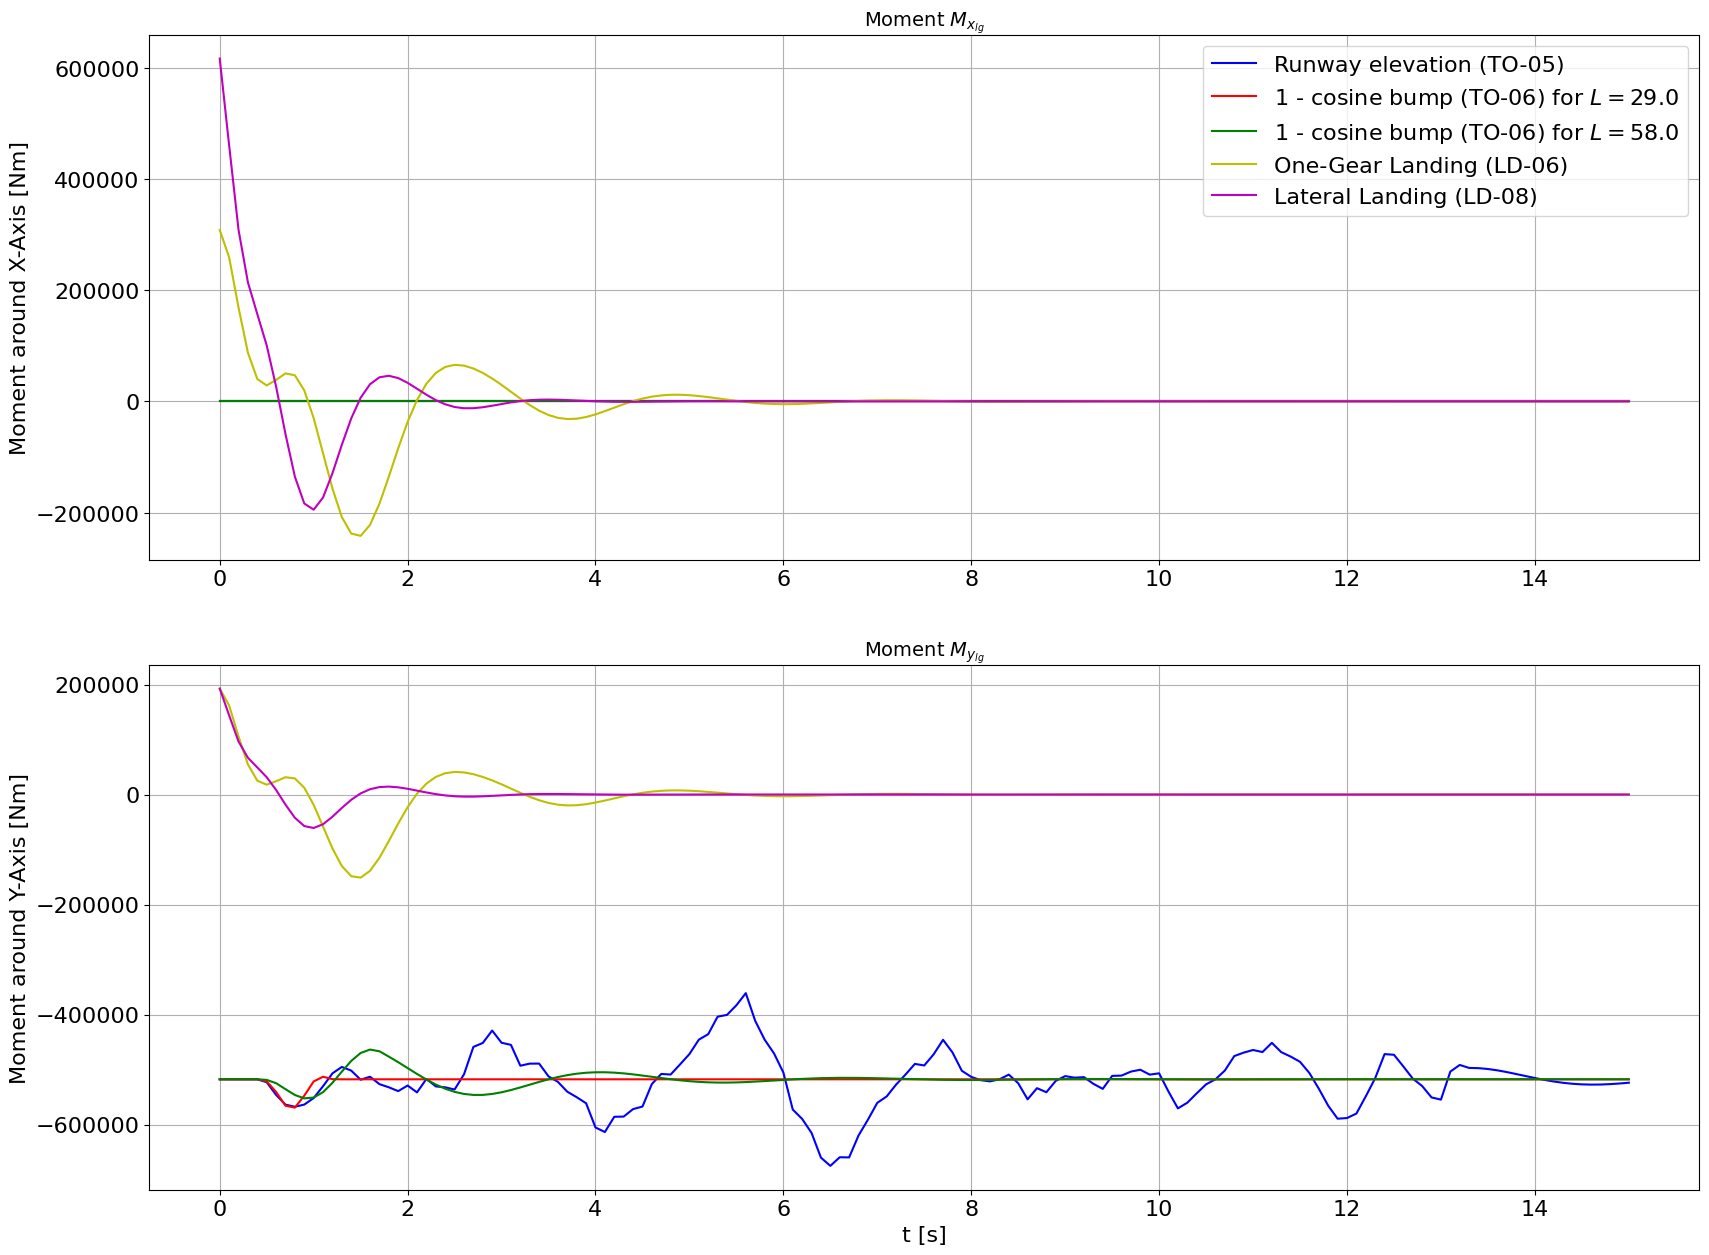

In [25]:
# forces

fig, ax = plt.subplots(3,1, figsize = (20, 15))
ax[0].set_title("Load $F_{x_{lg}}$",fontsize = 14)
ax[0].plot(t, Mtow * (z1dd_El + g) * 0.25, label = 'Runway elevation (TO-05)', color = 'b')
ax[0].plot(t, Mtow * (z1dd_cos1 + g) * 0.25, label = f'1 - cosine bump (TO-06) for $L = {L1*1e-3}$', color = 'r')
ax[0].plot(t, Mtow * (z1dd_cos2 + g) * 0.25, label = f'1 - cosine bump (TO-06) for $L = {L2*1e-3}$', color = 'g')
ax[0].plot(t, Mlw * (z1dd_OG) * 0.25, label = f'One-Gear Landing (LD-06)', color = 'y')
ax[0].plot(t, Mlw_lat * (z1dd_LA) * 0.25, label = f' Lateral Landing (LD-08)', color = 'm')
ax[0].set_ylabel("Force in X-direction [N]", fontsize = 14)
ax[0].tick_params(axis = 'both', labelsize = 14)
ax[0].grid()
ax[0].legend(fontsize = 10)

ax[1].set_title("Load $F_{y_{lg}}$",fontsize = 14)
ax[1].plot(t, np.zeros_like(t), label = 'Runway elevation (TO-05)', color = 'b')
ax[1].plot(t, np.zeros_like(t), label = f'1 - cosine bump (TO-06) for $L = {L1*1e-3}$', color = 'r')
ax[1].plot(t, np.zeros_like(t), label = f'1 - cosine bump (TO-06) for $L = {L2*1e-3}$', color = 'g')
ax[1].plot(t, Mlw * (z1dd_OG) * 0.4, label = f'One-Gear Landing (LD-06)', color = 'y')
ax[1].plot(t, Mlw * (z1dd_OG) * 0.8, label = f'Lateral Landing (LD-08)', color = 'm')
ax[1].set_ylabel("Force in Y-direction [N]", fontsize = 14)
ax[1].tick_params(axis = 'both', labelsize = 14)
ax[1].grid()

ax[2].set_title("Load $F_{z_{lg}}$",fontsize = 14)
ax[2].plot(t, Mtow * (z1dd_El + g), label = 'Runway elevation (TO-05)', color = 'b')
# ax[2].plot(t, (z2_El - z1_El), label = 'Runway elevation Stroke (TO-05)')
ax[2].plot(t, Mtow * (z1dd_cos1 + g), label = f'1 - cosine bump (TO-04) for $L = {L1*1e-3}$', color = 'r')
ax[2].plot(t, Mtow * (z1dd_cos2 + g), label = f'1 - cosine bump (TO-04) for $L = {L2*1e-3}$', color = 'g')
ax[2].plot(t, Mlw * (z1dd_OG), label = f'One-Gear Landing (LD-06)', color = 'y')
ax[2].plot(t, Mlw_lat * (z1dd_LA), label = f'Lateral Landing (LD-08)', color = 'm')
ax[2].set_ylabel("Force in Z-direction [N]", fontsize = 14)
ax[2].set_xlabel('t [s]', fontsize = 14)
ax[2].tick_params(axis = 'both', labelsize = 14)
ax[2].grid()

plt.show()


# moments

fig, ax = plt.subplots(2,1, figsize = (20,15))

StrokeEl = (z2_El - z1_El)
StrokeCos1 = (z2_cos1 - z1_cos1)
StrokeCos2 = (z2_cos2 - z1_cos2)
StrokeOG = (- z1_OG)
StrokeLA = (- z1_LA)

DiffEl = max_stroke - StrokeEl
DiffCos1 = max_stroke - StrokeCos1
DiffCos2 = max_stroke - StrokeCos2
DiffOG = max_stroke - StrokeOG
DiffLA = max_stroke - StrokeLA

ax[0].set_title("Moment $M_{x_{lg}}$",fontsize = 14)
ax[0].plot(t, np.zeros_like(t)* DiffEl, label = 'Runway elevation (TO-05)', color = 'b')
ax[0].plot(t, np.zeros_like(t) * DiffCos1, label = f'1 - cosine bump (TO-06) for $L = {L1*1e-3}$', color = 'r')
ax[0].plot(t, np.zeros_like(t) * DiffCos2, label = f'1 - cosine bump (TO-06) for $L = {L2*1e-3}$', color = 'g')
ax[0].plot(t, Mlw * (z1dd_OG) * 0.4 * DiffOG, label = f'One-Gear Landing (LD-06)', color = 'y')
ax[0].plot(t, Mlw_lat * (z1dd_LA) * 0.8 * DiffLA, label = f'Lateral Landing (LD-08)', color = 'm')
ax[0].legend(fontsize = 16)
ax[0].tick_params(axis = 'both', labelsize = 16)
ax[0].set_ylabel("Moment around X-Axis [Nm]", fontsize = 16)
ax[0].grid()

ax[1].set_title("Moment $M_{y_{lg}}$",fontsize = 14)
ax[1].plot(t, Mtow * (z1dd_El + g) * 0.25 * DiffEl, label = 'Runway elevation (TO-05)', color = 'b')
# ax[2].plot(t, (z2_El - z1_El), label = 'Runway elevation Stroke (TO-05)')
ax[1].plot(t, Mtow * (z1dd_cos1 + g) *0.25 * DiffCos1, label = f'1 - cosine bump (TO-06) for $L = {L1*1e-3}$', color = 'r')
ax[1].plot(t, Mtow * (z1dd_cos2 + g) * 0.25 * DiffCos2, label = f'1 - cosine bump (TO-06) for $L = {L2*1e-3}$', color = 'g')
ax[1].plot(t, Mlw * (z1dd_OG) *0.25 * DiffOG, label = f'One-Gear Landing (LD-06)', color = 'y')
ax[1].plot(t, Mlw_lat * (z1dd_LA)* 0.25 * DiffLA, label = f'Lateral Landing (LD-08)', color = 'm')
ax[1].set_ylabel("Moment around Y-Axis [Nm]", fontsize = 16)
ax[1].set_xlabel('t [s]', fontsize = 16)
ax[1].tick_params(axis = 'both', labelsize = 16)
ax[1].grid()

plt.show()

Optimization of K anc C for a desired dynamic behaviour
===

The main objective of Rutger's MSc thesis was to obtain a lightweight design for the Flying-V. The landing gear loads strongly influence the weight, and the reasoning here is simple: the lower the loads, the lower the structural weight.

The stiffness and damping parameters $K$, and $C$ in the equation of motion can be tuned to minimise the loads.

Here, the load factor is minimised with the lateral landing load case. Additionally, properties of the other load cases are added as constraints to the optimisation algoritm.

To summarise, the following **constraints** are applied to the problem:

- Constraint 1: Maximum bounceback of 0.3 m;

- Constraint 2: Maximum stroke of 800 mm;

- Constraint 3: For all other load cases except for the optimisation load case (LD-08) the load factor is restricted to 0 for the minimum, and 2 for the maximum load factor;

- Constraint 4: The static stroke corresponding to the MTOW should be lower or equal to 80 % of
the maximum stroke.


**Loadfactor minimisation**

The load factor on the aircraft of load case ”Lateral landing” LD-08 is minimised by using the Differential
Evolution algorithm of Pymoo.

The Differential Evolution algorithm tends easier to converge to a global minimum since the algorithm is population-based and not gradient based. The algorithm chooses a random population of parameters selected using Latin Hypercube Sampling (LHS) method in the first step, where the next population is selected based on the results of the previous population.
In mathematical terms, the objective function is compiled as follow:

- minimize load factor in z $N_z$ with respect to $K$, $C$

- subject to:

-- $−0.3 \le 𝑧_1 − 𝑧_2 \le 0.8$

-- $M_{ac} \cdot g \cdot K \lt 80\% \cdot 0.8$

-- $0 \le N_z$ (except for LD-08) where $N_z \le 2$

In [26]:
from pymoo.problems.functional import FunctionalProblem
from pymoo.factory import get_algorithm, get_crossover, get_mutation, get_sampling, get_termination
from pymoo.optimize import minimize
from pymoo.algorithms.soo.nonconvex.sres import SRES
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.operators.sampling.lhs import LHS
import matplotlib.pyplot as plt
import pandas as pd

SavedSolution = np.zeros((len(t), 2))


def Constraints(Parameters):
    K = Parameters[0]
    C = Parameters[1]
    Y0 = [-Mtow * g / K, 0]
    sol = odeint(OEMLG_Input, Y0, t , args=(K, C, L_TO, Mtow, g, RunWayElevationFun, GradRunWayElevationFun))
    z1 = sol[:,0]
    z1d = sol[:,1]
    if OptionalLGBounce:
        Y0_landing = [0, VerticalLandingSpeed]
        solLD = odeint(OEMLG_Input, Y0_landing, t , args=(K, C, L_LD_LA, Mlw_lat, g, LateralLanding, GradLateralLanding))
        z1LD = solLD[:,0]
        z1dLD = solLD[:,1]
        Constraint4 = np.max(z1LD - BounceBackAll) #Calculates bouncing constraint for landing for z2 = 0
        z1dd_LD = L_LD_LA / Mlw_lat - g - K / Mlw_lat * (z1LD) - C / Mlw_lat * (z1dLD)
        Constraint5 = np.max(np.abs(z1dd_LD) / g + g / g) - 2
    else:
        Constraint4 = -200 #Sets constraint to minus such that it always complies
        Constraint5 = -200
    SavedSolution[:,:] = sol

    EigFreq = np.sqrt(K/Mlw)/(2 * np.pi)

    z2 = RunWayElevationFun(t)
    z2d = GradRunWayElevationFun(t)

    Stroke = (z2 - z1)
    constraint1 = np.max(z1 - z2) #Bounceback
    constraint1 = -10 #Bouncing constraint of runway, turned off
    constraint2 = np.max(Stroke - max_stroke) #Stroke not too high

    constraintval = max([constraint1, constraint2, Constraint4, Constraint5]) #Needs to be lower than 0, therefore max

    print(f"ConstraintVal: {constraint1} {constraint2} {Constraint4} {Constraint5}")

    return constraintval


def Constraints_LandingOpt(Parameters):
    K = Parameters[0]
    C = Parameters[1]
    Y0 = [0, VerticalLandingSpeed]
    sol = odeint(OEMLG_Input, Y0, t , args=(K, C, L_LD_LA, Mlw_lat, g, LateralLanding, GradLateralLanding))
    sol2 = odeint(OEMLG_Input, Y0, t , args=(K, C, L_LD_OG, Mlw, g, OneGearLanding, GradOneGearLanding))
    z1_OG = sol2[:,0]
    z1 = sol[:,0]
    z1d = sol[:,1]

    #Input runway elevation loadcase as well
    Y0_TO = [- Mtow * g / K, 0]
    solTO = odeint(OEMLG_Input, Y0_TO, t , args=(K, C, L_TO, Mtow, g, RunWayElevationFun, GradRunWayElevationFun))
    z1TO = solTO[:,0]
    z1dTO = solTO[:,1]
    z1dd_TO = L_TO / Mtow - g - K / Mtow * (z1TO - RunWayElevationFun(t)) - C / Mtow * (z1dTO - GradRunWayElevationFun(t))

    StrokeTO = RunWayElevationFun(t) -  z1TO
    Constraint3 = np.max(StrokeTO - max_stroke) #Stroke not too high for TO cases
    Constraint5 = np.max(np.abs(z1dd_TO) / g + g / g) - 2 #Keeping loadfactor beneath two
    Constraint7 = (Mtow * g / K - max_stroke * 0.8)

    SavedSolution[:,:] = sol

    Stroke = (- z1)
    constraint1 = np.max(z1 - BounceBackAll) #Bounceback
    # constraint1 = -10 #Bouncing constraint of runway, turned off
    constraint2 = np.max(Stroke - max_stroke) #Stroke not too high

    Constraint4 = np.max(z1_OG - BounceBackAll)
    Constraint6 = np.max((- z1_OG) - max_stroke)

    constraintval = max([constraint1, constraint2, Constraint3, Constraint4,  Constraint5, Constraint6, Constraint7]) #Needs to be lower than 0, therefore max

    return constraintval


def ObtainLoadFactor(Parameters):
    K = Parameters[0]
    C = Parameters[1]
    Y0 = [-Mtow * g / K, 0] #Static stroke
    sol = SavedSolution
    z1 = sol[:,0]
    z1d = sol[:,1]
    Mac = Mtow
    z2 = RunWayElevationFun(t)
    z2d = GradRunWayElevationFun(t)
    z1dd = L_TO / Mac - g - K/Mac * (z1 - z2) - C / Mac * (z1d - z2d)
    if AddCosineBump_toOpt:
        solcos = odeint(OEMLG_Input, Y0, t , args=(K, C, L_TO, Mac, g, CosineBump1Fun, GradCosineBump1Fun))
        z1_cos = solcos[:,0]
        z1d_cos = solcos[:,1]
        z2_cos = CosineBump1Fun(t)
        z2d_cos = GradCosineBump1Fun(t)
        z1dd_cos = L_TO / Mac - g - K/Mac * (z1_cos - z2_cos) - C / Mac * (z1d_cos - z2d_cos)
    else:
        z1dd_cos = 0

    #Get 1-cosine loadcase
    z1dd_max = max([np.max(np.abs(z1dd)), np.max(np.abs(z1dd_cos))])
    Force = z1dd_max / g

    print(f'Current LF {z1dd_max / g + g / g} [-]')

    return z1dd_max / g + g / g


def ObtainLoadFactor_LandingOpt(Parameters):
    K = Parameters[0]
    C = Parameters[1]
    Y0 = [-Mtow * g / K, 0] #Static stroke
    sol = SavedSolution
    z1 = sol[:,0]
    z1d = sol[:,1]
    Mac = Mlw_lat
    z2 = 0
    z2d = 0
    z1dd = L_LD_LA / Mac - g - K/Mac * (z1 - z2) - C / Mac * (z1d - z2d)
    #Get 1-cosine loadcase
    z1dd_max = max([np.max(np.abs(z1dd))])
    Force = z1dd_max / g
    return z1dd_max / g + g / g #Loadfactor


#The mass function
objs = [ObtainLoadFactor_LandingOpt]

#Both MoS's are evaluated in one loop, the minimum MoS is taken as constraint
constr_ieq = [Constraints_LandingOpt]

#Set the limits already close to the final solution in order to reduce the computation effort, approximately the limits
xl = [1e4, 1e4]
xu = [1e8, 1e6]

problem = FunctionalProblem(2,
                            objs,
                            constr_ieq=constr_ieq,
                            xl=xl,
                            xu=xu,
                            type_var= [float, float]
                            )

algorithm = DE(
    pop_size = 20, # Advised is to take a population size of 10*n_vals
    sampling= LHS(), # Latin hypercubed sampling
    variant="DE/rand/1/bin", #Population based on random numbers
    CR=0.3, #CrossOver
    dither="vector",
    jitter=False)

res = minimize(problem,
            algorithm,
            ('ftol', 0.1), #Set tolerance to 0.1 g
            seed=1,
            save_history=True
            )

print("Best solution found: %s" % res.X)
print("Function value: %s" % res.F)
print("Constraint violation: %s" % res.CV)

# #Plot optimalisation
# history = res.history

# val = [m for m in history.opt.Get("F")]
# x = [i for i in range(len(val))]
Parameters = res.X
K = Parameters[0]
C = Parameters[1]


Exception: Termination not found.